In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('LEUKEMIA_Cancer_Data (1).csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,842302,M,17.99,10.38,122.80,1001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006193,25.380,17.33,184.60,2019.0
1,842517,M,20.57,17.77,132.90,1326.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003532,24.990,23.41,158.80,1956.0
2,84300903,M,19.69,21.25,130.00,1203.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.004571,23.570,25.53,152.50,1709.0
3,84348301,M,11.42,20.38,77.58,386.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009208,14.910,26.50,98.87,567.7
4,84358402,M,20.29,14.34,135.10,1297.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.005115,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.004239,25.450,26.40,166.10,2027.0
565,926682,M,20.13,28.25,131.20,1261.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002498,23.690,38.25,155.00,1731.0
566,926954,M,16.60,28.08,108.30,858.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003892,18.980,34.12,126.70,1124.0
567,927241,M,20.60,29.33,140.10,1265.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006185,25.740,39.42,184.60,1821.0


In [6]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    569 non-null    int64  
 1   diagnosis             569 non-null    object 
 2   radius_mean           569 non-null    float64
 3   texture_mean          569 non-null    float64
 4   perimeter_mean        569 non-null    float64
 5   area_mean             569 non-null    float64
 6   Unnamed: 6            0 non-null      float64
 7   Unnamed: 7            0 non-null      float64
 8   Unnamed: 8            0 non-null      float64
 9   Unnamed: 9            0 non-null      float64
 10  symmetry_mean         569 non-null    float64
 11  Unnamed: 11           0 non-null      float64
 12  radius_se             569 non-null    float64
 13  texture_se            569 non-null    float64
 14  perimeter_se          569 non-null    float64
 15  area_se               5

In [7]:
data_cleaned = data.drop(columns=['id'] + [col for col in data.columns if 'Unnamed' in col])

print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   symmetry_mean         569 non-null    float64
 6   radius_se             569 non-null    float64
 7   texture_se            569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  fractal_dimension_se  569 non-null    float64
 11  radius_worst          569 non-null    float64
 12  texture_worst         569 non-null    float64
 13  perimeter_worst       569 non-null    float64
 14  area_worst            569 non-null    float64
dtypes: float64(14), object(

In [8]:
data_cleaned.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.181162,0.405172,1.216853,2.866059,40.337079,0.003795,16.269190,25.677223,107.261213,880.583128
std,3.524049,4.301036,24.298981,351.914129,0.027414,0.277313,0.551648,2.021855,45.491006,0.002646,4.833242,6.146258,33.602542,569.356993
min,6.981000,9.710000,43.790000,143.500000,0.106000,0.111500,0.360200,0.757000,6.802000,0.000895,7.930000,12.020000,50.410000,185.200000
25%,11.700000,16.170000,75.170000,420.300000,0.161900,0.232400,0.833900,1.606000,17.850000,0.002248,13.010000,21.080000,84.110000,515.300000
50%,13.370000,18.840000,86.240000,551.100000,0.179200,0.324200,1.108000,2.287000,24.530000,0.003187,14.970000,25.410000,97.660000,686.500000
75%,15.780000,21.800000,104.100000,782.700000,0.195700,0.478900,1.474000,3.357000,45.190000,0.004558,18.790000,29.720000,125.400000,1084.000000
max,28.110000,39.280000,188.500000,2501.000000,0.304000,2.873000,4.885000,21.980000,542.200000,0.029840,36.040000,49.540000,251.200000,4254.000000


In [9]:
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

In [10]:
X = data_cleaned.drop(columns='diagnosis')
y = data_cleaned['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [14]:
def determine_stage(area):
    if area < 500:
        return 1
    elif 500 <= area < 1000:
        return 2
    elif 1000 <= area < 1500:
        return 3
    else:
        return 4

data_cleaned['stage'] = data_cleaned['area_mean'].apply(determine_stage)


In [15]:
X = data_cleaned.drop(columns=['diagnosis', 'stage'])
y = data_cleaned[['diagnosis', 'stage']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.multioutput import MultiOutputClassifier
multi_target_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_target_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [18]:
y_pred = multi_target_model.predict(X_test)
diagnosis_accuracy = accuracy_score(y_test['diagnosis'], y_pred[:, 0])
stage_accuracy = accuracy_score(y_test['stage'], y_pred[:, 1])

diagnosis_report = classification_report(y_test['diagnosis'], y_pred[:, 0], target_names=['Benign', 'Malignant'])
stage_report = classification_report(y_test['stage'], y_pred[:, 1])

print("Diagnosis (Malignant/Benign) Accuracy:", diagnosis_accuracy)
print("Stage Accuracy:", stage_accuracy)
print("\nDiagnosis Classification Report:\n", diagnosis_report)
print("\nStage Classification Report:\n", stage_report)

Diagnosis (Malignant/Benign) Accuracy: 0.9707602339181286
Stage Accuracy: 1.0

Diagnosis Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       108
   Malignant       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Stage Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         3

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('LEUKEMIA_Cancer_Data (1).csv')

def predict_cancer_diagnosis_and_stage():
    try:
        radius_mean = float(input("Enter radius_mean: "))
        texture_mean = float(input("Enter texture_mean: "))
        perimeter_mean = float(input("Enter perimeter_mean: "))
        area_mean = float(input("Enter area_mean: "))
        symmetry_mean = float(input("Enter symmetry_mean: "))
        radius_se = float(input("Enter radius_se: "))
        texture_se = float(input("Enter texture_se: "))
        perimeter_se = float(input("Enter perimeter_se: "))
        area_se = float(input("Enter area_se: "))
        fractal_dimension_se = float(input("Enter fractal_dimension_se: "))
        radius_worst = float(input("Enter radius_worst: "))
        texture_worst = float(input("Enter texture_worst: "))
        perimeter_worst = float(input("Enter perimeter_worst: "))
        area_worst = float(input("Enter area_worst: "))
    except ValueError:
        print("Invalid input. Please enter numeric values for all parameters.")
        return
    input_data = np.array([
        radius_mean, texture_mean, perimeter_mean, area_mean, symmetry_mean,
        radius_se, texture_se, perimeter_se, area_se, fractal_dimension_se,
        radius_worst, texture_worst, perimeter_worst, area_worst
    ]).reshape(1, -1)
    prediction = multi_target_model.predict(input_data)
    diagnosis_pred, stage_pred = prediction[0]

    diagnosis_label = "Malignant" if diagnosis_pred == 1 else "Benign"
    print(f"\nPredicted Diagnosis: {diagnosis_label}")
    print(f"Predicted Cancer Stage: Stage {stage_pred}")
predict_cancer_diagnosis_and_stage()


Enter radius_mean: 345
Enter texture_mean: 323
Enter perimeter_mean: 345
Enter area_mean: 3224
Enter symmetry_mean: 345
Enter radius_se: 234
Enter texture_se: 234
Enter perimeter_se: 35
Enter area_se: 343
Enter fractal_dimension_se: 234
Enter radius_worst: 534
Enter texture_worst: 534
Enter perimeter_worst: 234
Enter area_worst: 3543

Predicted Diagnosis: Malignant
Predicted Cancer Stage: Stage 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


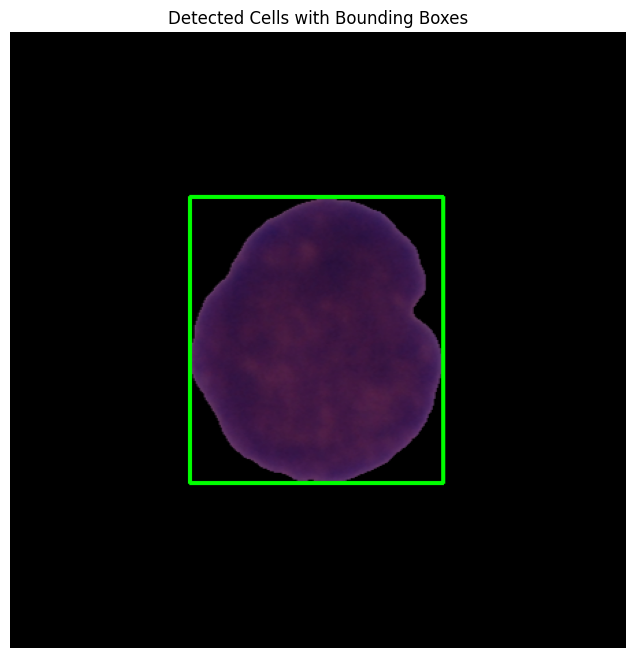

Detected Cells: 1
Average Radius: 96.02831563004953
Average Texture: 8.023548015748087
Average Perimeter: 656.7249634685276
Average Area: 28970.0
Average Symmetry: 0.8851674641148325
Average Fractal Dimension: -1.9797862517663865


In [19]:
import cv2
import numpy as np
from skimage import measure
from skimage.feature import canny
from scipy import ndimage
import matplotlib.pyplot as plt

# Load and process image
image = cv2.imread('95.bmp')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Edge detection and thresholding
edges = canny(blurred, sigma=2)
_, binary_image = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Label connected regions
labels = measure.label(binary_image)

# Initialize lists to store computed properties for each cell
radii = []
textures = []
perimeters = []
areas = []
symmetries = []
fractal_dimensions = []
for region in measure.regionprops(labels, intensity_image=gray_image):
    if region.area >= 50:
        area = region.area
        areas.append(area)

        perimeter = region.perimeter
        perimeters.append(perimeter)
        radius = np.sqrt(area / np.pi)
        radii.append(radius)
        texture = np.std(region.intensity_image[region.coords[:, 0] - region.bbox[0],
                                                region.coords[:, 1] - region.bbox[1]])
        textures.append(texture)
        minr, minc, maxr, maxc = region.bbox
        bbox_height = maxr - minr
        bbox_width = maxc - minc
        symmetry = min(bbox_width, bbox_height) / max(bbox_width, bbox_height)
        symmetries.append(symmetry)
        binary_region = (binary_image[minr:maxr, minc:maxc] > 0).astype(np.uint8)
        sizes = np.arange(1, min(binary_region.shape), 1)
        counts = [np.sum(cv2.resize(binary_region, (s, s)) > 0) for s in sizes]
        coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
        fractal_dim = -coeffs[0]
        fractal_dimensions.append(fractal_dim)
        cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Cells with Bounding Boxes")
plt.axis("off")
plt.show()
print("Detected Cells:", len(areas))
print("Average Radius:", np.mean(radii) if radii else 0)
print("Average Texture:", np.mean(textures) if textures else 0)
print("Average Perimeter:", np.mean(perimeters) if perimeters else 0)
print("Average Area:", np.mean(areas) if areas else 0)
print("Average Symmetry:", np.mean(symmetries) if symmetries else 0)
print("Average Fractal Dimension:", np.mean(fractal_dimensions) if fractal_dimensions else 0)


In [20]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data_labels = pd.read_csv('C-NMC_test_prelim_phase_data_labels.csv')
print("Data labels loaded:")
print(data_labels.head())

Data labels loaded:
             Patient_ID new_names  labels
0   UID_57_29_1_all.bmp     1.bmp       1
1   UID_57_22_2_all.bmp     2.bmp       1
2   UID_57_31_3_all.bmp     3.bmp       1
3  UID_H49_35_1_hem.bmp     4.bmp       0
4   UID_58_6_13_all.bmp     5.bmp       1


Shape of the processed image: (224, 224)


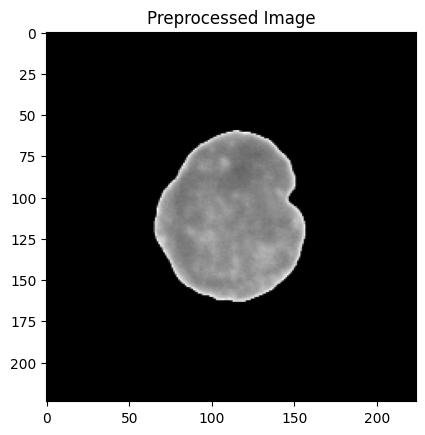

In [23]:
import cv2
import matplotlib.pyplot as plt

image_path = '95.bmp'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_resized = cv2.resize(image_gray, (224, 224))
image_normalized = image_resized / 255.0

print("Shape of the processed image:", image_normalized.shape)

plt.imshow(image_normalized, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [24]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb_resized = cv2.resize(image_rgb, (224, 224))
image_array = img_to_array(image_rgb_resized) / 255.0
image_array = np.expand_dims(image_array, axis=0)

features = model.predict(image_array).flatten()
print("Extracted features shape:", features.shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Extracted features shape: (25088,)


In [26]:
if 'stage' in data_labels.columns:
    y = data_labels['stage']
else:
    y = np.random.randint(0, 2, size=(len(data_labels),))

X = np.tile(features, (len(data_labels), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4839572192513369
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.48      1.00      0.65       181

    accuracy                           0.48       374
   macro avg       0.24      0.50      0.33       374
weighted avg       0.23      0.48      0.32       374



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
def predict_cancer_stage(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb_resized = cv2.resize(image_rgb, (224, 224))
    image_array = img_to_array(image_rgb_resized) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    features = model.predict(image_array).flatten().reshape(1, -1)

    prediction = clf.predict(features)
    return prediction[0]

print("Predicted Cancer Stage:", predict_cancer_stage('95.bmp'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Predicted Cancer Stage: 1


In [ ]:
from flask import Flask, request, render_template, redirect, url_for, session
import os
app = Flask(__name__)
app.secret_key = 'your_secret_key'
app.config['UPLOAD_FOLDER'] = 'uploads/'
def process_parameters(params):
    diagnosis = "Positive"
    stage = "Stage 2"
    return diagnosis, stage
def process_image(image_path):
    diagnosis = "Positive"
    stage = "Stage 3"
    return diagnosis, stage
@app.route('/upload-image', methods=['POST'])
def upload_image():
    if 'cellImage' not in request.files:
        return "No file part", 400

    file = request.files['cellImage']
    if file.filename == '':
        return "No selected file", 400

    if file:
        file_path = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        file.save(file_path)

        diagnosis, stage = process_image(file_path)

        session['diagnosis'] = diagnosis
        session['stage'] = stage

        return redirect(url_for('result'))
@app.route('/submit-parameters', methods=['POST'])
def submit_parameters():
    params = {key: float(value) for key, value in request.form.items() if value}
    diagnosis, stage = process_parameters(params)

    session['diagnosis'] = diagnosis
    session['stage'] = stage

    return redirect(url_for('result'))

@app.route('/result')
def result():
    diagnosis = session.get('diagnosis', 'Not available')
    stage = session.get('stage', 'Not available')
    return render_template('result.html', diagnosis=diagnosis, stage=stage)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
